# 简单线性回归（最小二乘法）

### 0. 引入依赖

In [8]:
import numpy as np
import matplotlib.pyplot as plt

### 1. 导入数据（data.csv）

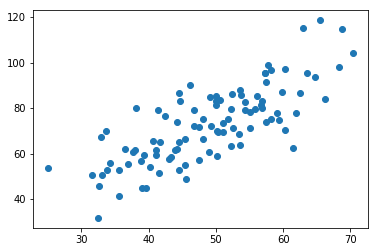

0

In [22]:
points = np.genfromtxt('data.csv', delimiter=',')

points[0,0]

# 提取points中的两列数据，分别作为x，y
x = points[:, 0]
y = points[:, 1]

# 用plt画出散点图
plt.scatter(x, y)
plt.show()


### 2. 定义损失函数

In [23]:
# 损失函数是系数的函数，另外还要传入数据的x，y
def compute_cost(w, b, points):
    total_cost = 0
    M = len(points)
    
    # 逐点计算平方损失误差，然后求平均数
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += ( y - w * x - b ) ** 2
    
    return total_cost/M

### 3.定义算法拟合函数

In [24]:
# 先定义一个求均值的函数
def average(data):
    sum = 0
    num = len(data)
    for i in range(num):
        sum += data[i]
    return sum/num

# 定义核心拟合函数
def fit(points):
    M = len(points)
    x_bar = average(points[:, 0])
    
    sum_yx = 0
    sum_x2 = 0
    sum_delta = 0
    
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        sum_yx += y * ( x - x_bar )
        sum_x2 += x ** 2
    # 根据公式计算w
    w = sum_yx / ( sum_x2 - M * (x_bar**2) )
    
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        sum_delta += ( y - w * x )
    b = sum_delta / M
    
    return w, b

### 4. 测试

In [25]:
w, b = fit(points)

print("w is: ", w)
print("b is: ", b)

cost = compute_cost(w, b, points)

print("cost is: ", cost)

w is:  1.3224310227553846
b is:  7.991020982269173
cost is:  110.25738346621313


### 5. 画出拟合曲线

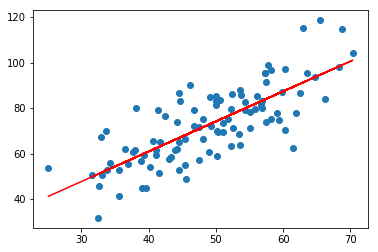

In [26]:
plt.scatter(x, y)
# 针对每一个x，计算出预测的y值
pred_y = w * x + b

plt.plot(x, pred_y, c='r')
plt.show()